In [2]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'cb_coin_price_202310161618.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify the data has been read correctly
df.head()

,coin_price_uid,coin_id,coin_open_price,coin_high_price,coin_low_price,coin_trade_price,coin_timestamp,candle_acc_trade_price,candle_acc_trade_volume,candle_dtm_utc,candle_dtm_kst,unit,reg_id,reg_dtm,upd_id,upd_dtm
0,1,1,36952000,36955000,36949000,36955000,1697282817171,3.394779e+07,0.918716,2023-10-14T11:26:00,2023-10-14T20:26:00,1,NaN,2023-10-14 20:27:00,NaN,NaN
1,2,1,36955000,36955000,36952000,36952000,1697282759564,2.535872e+07,0.686216,2023-10-14T11:25:00,2023-10-14T20:25:00,1,NaN,2023-10-14 20:27:00,NaN,NaN
2,3,1,36971000,36971000,36955000,36955000,1697282694970,4.615304e+07,1.248798,2023-10-14T11:24:00,2023-10-14T20:24:00,1,NaN,2023-10-14 20:27:00,NaN,NaN
3,4,1,36956000,36971000,36955000,36971000,1697282632090,2.561169e+07,0.692962,2023-10-14T11:23:00,2023-10-14T20:23:00,1,NaN,2023-10-14 20:27:00,NaN,NaN
4,5,1,36971000,36971000,36955000,36955000,1697282572562,1.685844e+07,0.456062,2023-10-14T11:22:00,2023-10-14T20:22:00,1,NaN,2023-10-14 20:27:00,NaN,NaN


In [3]:
indexes =["coin_open_price"]#,"coin_high_price","coin_low_price","coin_trade_price","candle_acc_trade_volume"]

selected_df=df.loc[:10000,indexes]
selected_df

,coin_open_price
0,36952000
1,36955000
2,36971000
3,36956000
4,36971000
...,...
9996,37957000
9997,37969000
9998,37970000
9999,37991000


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataframe with coin prices
# Assuming you have a column 'price' containing the coin prices
prices = selected_df.values.reshape(-1, 1)
# print(prices)

# # Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
# 
# # Create sequences of 1000 values for input and corresponding target values
# def create_sequences(data, seq_length):
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         seq = data[i:i+seq_length]
#         label = data[i+seq_length]
#         X.append(seq)
#         y.append(label)
#     return np.array(X), np.array(y)
# 
# # Define the sequence length
# sequence_length = 1000
# 
# # Create sequences and targets
# X, y = create_sequences(prices_scaled, sequence_length)
# 
# # Split the data into training and testing sets
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]
# 
# # Reshape the input data for LSTM
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# 
# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))  # Increased LSTM units
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')
# 
# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# 
# # Train the model with early stopping
# model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
# 
# # Evaluate the model
# train_loss = model.evaluate(X_train, y_train, verbose=0)
# test_loss = model.evaluate(X_test, y_test, verbose=0)
# print(f'Training Loss: {train_loss}, Testing Loss: {test_loss}')
# 
# # Make predictions
# predicted_prices_scaled = model.predict(X_test)
# 
# # Inverse transform the predicted values to get the original scale
# predicted_prices = scaler.inverse_transform(predicted_prices_scaled)
# 
# # Do further analysis or plotting as needed


[[36952000]
 [36955000]
 [36971000]
 ...
 [37970000]
 [37991000]
 [37973000]]


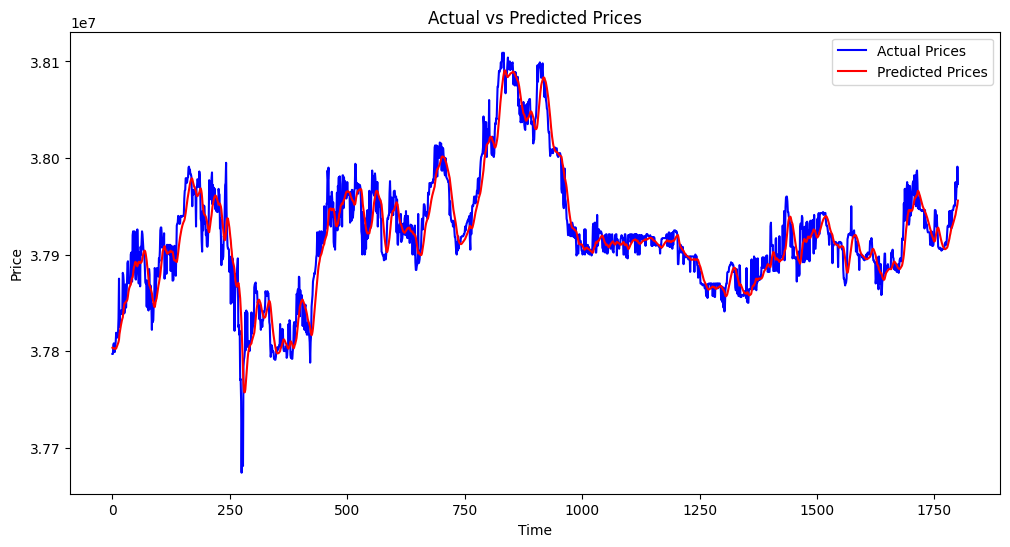

In [4]:
import matplotlib.pyplot as plt

# Inverse transform the actual test values to get the original scale
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:

# Save the trained model
model.save('lstm_model.h5')

C:\Users\wjdqh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
